# Group 4
# Muhammad Rizwan
# RNN with k-fold and default split 80/20 on MNIST dataset

In [45]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from keras.utils import to_categorical

# Load the MNIST dataset

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Merge Train and Test Instances to Create Merge Dataset

In [47]:
X_data = []
y_data = []
for i in range(10):
    class_indices = np.where(y_train == i)[0][:]
    X_data.extend(X_train[class_indices])
    y_data.extend(y_train[class_indices])

In [48]:
X_data = np.array(X_data)
y_data = np.array(y_data)


In [49]:
print(X_data.shape)

(60000, 28, 28)


# Reshape and preprocess the data


In [50]:
input_dim = X_data.shape[1] * X_data.shape[2]
X_data = X_data.reshape((-1, 1, input_dim))
X_data = X_data.astype('float32') / 255.0  # Normalize pixel values

In [51]:
num_classes = 10
k = 10  # Number of folds
accuracies = []
f1_scores = []
sensitivities = []
specificities = []
precisions = []
recalls = []
confusion_matrices = []

# RNN with k-fold cross-validation where k =10

In [52]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_data):
    X_train, X_val = X_data[train_index], X_data[test_index]
    y_train, y_val = y_data[train_index], y_data[test_index]

    model = Sequential()
    model.add(SimpleRNN(128, input_shape=(1, 28*28), activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

    y_pred = model.predict(X_val)
    
    # Convert to categorical labels for computing classification metrics
    y_val_categorical = to_categorical(y_val, num_classes=num_classes)
    y_pred_categorical = to_categorical(np.argmax(y_pred, axis=1), num_classes=num_classes)
    
    accuracy = accuracy_score(y_val_categorical, y_pred_categorical)
    f1 = f1_score(y_val_categorical, y_pred_categorical, average='macro')
    recall = recall_score(y_val_categorical, y_pred_categorical, average='macro')
    precision = precision_score(y_val_categorical, y_pred_categorical, average='macro')
    #conf_mat = confusion_matrix(y_val_categorical.argmax(axis=1), y_pred_categorical.argmax(axis=1))

    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)
    #confusion_matrices.append(conf_mat)

Epoch 1/10
1688/1688 - 12s - loss: 0.2733 - accuracy: 0.9213 - 12s/epoch - 7ms/step
Epoch 2/10
1688/1688 - 12s - loss: 0.1234 - accuracy: 0.9636 - 12s/epoch - 7ms/step
Epoch 3/10
1688/1688 - 12s - loss: 0.0853 - accuracy: 0.9745 - 12s/epoch - 7ms/step
Epoch 4/10
1688/1688 - 12s - loss: 0.0639 - accuracy: 0.9805 - 12s/epoch - 7ms/step
Epoch 5/10
1688/1688 - 13s - loss: 0.0480 - accuracy: 0.9849 - 13s/epoch - 8ms/step
Epoch 6/10
1688/1688 - 12s - loss: 0.0379 - accuracy: 0.9886 - 12s/epoch - 7ms/step
Epoch 7/10
1688/1688 - 12s - loss: 0.0300 - accuracy: 0.9910 - 12s/epoch - 7ms/step
Epoch 8/10
1688/1688 - 12s - loss: 0.0242 - accuracy: 0.9925 - 12s/epoch - 7ms/step
Epoch 9/10
1688/1688 - 12s - loss: 0.0208 - accuracy: 0.9940 - 12s/epoch - 7ms/step
Epoch 10/10
1688/1688 - 13s - loss: 0.0165 - accuracy: 0.9951 - 13s/epoch - 7ms/step
188/188 [==============================] - 1s 3ms/step
Epoch 1/10
1688/1688 - 15s - loss: 0.2652 - accuracy: 0.9255 - 15s/epoch - 9ms/step
Epoch 2/10
1688/1688

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [53]:
# Calculate average performance measures
average_accuracy = np.mean(accuracies)
average_f1_score = np.mean(f1_scores)
average_recall = np.mean(recalls)
average_precision = np.mean(precisions)
#average_confusion_matrix = np.mean(confusion_matrices, axis=0)

print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))
print("Average F1 Score: {:.2f}".format(average_f1_score))
print("Average Recall: {:.2f}".format(average_recall))
print("Average Precision: {:.2f}".format(average_precision))
#print("Average Confusion Matrix:")
#print(average_confusion_matrix)

Average Accuracy: 97.52%
Average F1 Score: 0.97
Average Recall: 0.98
Average Precision: 0.98


# Plot Precision-Recall curve


# RNN on Default dataset(80/20 split)

In [27]:
# Load the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
input_dim = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((-1, 1, input_dim))
X_test = X_test.reshape((-1, 1, input_dim))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [31]:
# One-hot encode the target labels
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)

# Define the RNN model 80/20 split

In [32]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(1, input_dim), activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 14s - loss: 0.2584 - accuracy: 0.9260 - 14s/epoch - 7ms/step
Epoch 2/10
1875/1875 - 13s - loss: 0.1167 - accuracy: 0.9661 - 13s/epoch - 7ms/step
Epoch 3/10
1875/1875 - 14s - loss: 0.0791 - accuracy: 0.9767 - 14s/epoch - 7ms/step
Epoch 4/10
1875/1875 - 11s - loss: 0.0598 - accuracy: 0.9822 - 11s/epoch - 6ms/step
Epoch 5/10
1875/1875 - 11s - loss: 0.0459 - accuracy: 0.9860 - 11s/epoch - 6ms/step
Epoch 6/10
1875/1875 - 11s - loss: 0.0362 - accuracy: 0.9889 - 11s/epoch - 6ms/step
Epoch 7/10
1875/1875 - 11s - loss: 0.0289 - accuracy: 0.9911 - 11s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 11s - loss: 0.0235 - accuracy: 0.9926 - 11s/epoch - 6ms/step
Epoch 9/10
1875/1875 - 11s - loss: 0.0189 - accuracy: 0.9941 - 11s/epoch - 6ms/step
Epoch 10/10
1875/1875 - 11s - loss: 0.0165 - accuracy: 0.9948 - 11s/epoch - 6ms/step


# Evaluate the model


In [34]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
cm = confusion_matrix(y_test, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


In [35]:
TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP
FP = np.sum(cm, axis=0) - TP
TN = np.sum(cm) - (TP + FN + FP)

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

In [36]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}".format(f1))
print("Sensitivity: {:.2f}".format(np.mean(sensitivity)))
print("Specificity: {:.2f}".format(np.mean(specificity)))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


Accuracy: 97.95%
F1 Score: 0.98
Sensitivity: 0.98
Specificity: 1.00
Precision: 0.98
Recall: 0.98


# Plot the confusion matrix


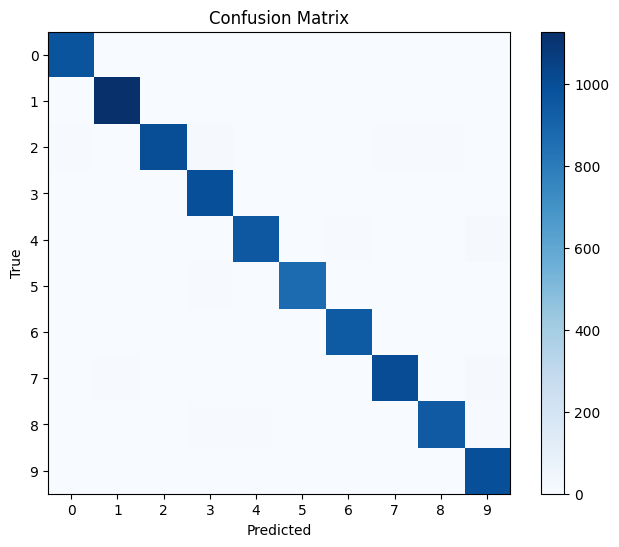

In [39]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve of each class

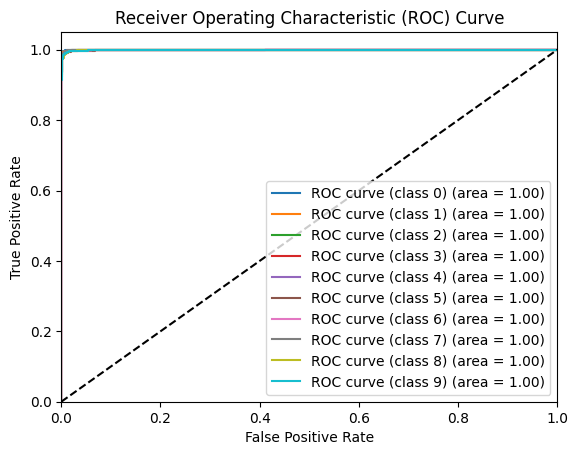

In [42]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute PR curve for each class

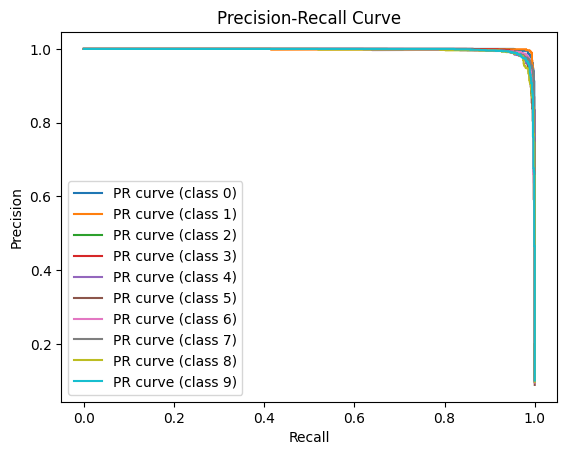

In [43]:
precision = dict()
recall = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred[:, i])

plt.figure()
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'PR curve (class {i})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()